Load Models and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from huggingface_hub import login
login()

In [2]:
!pip3 install datasets
!pip3 install emoji
#!pip3 install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

**Load and process Hatemoji dataset**

In [5]:
from datasets import load_dataset
import pandas as pd

# Load the dataset
dataset = load_dataset("HannahRoseKirk/HatemojiCheck")
pd_dataset = pd.DataFrame(dataset['test'])
pd_dataset.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating test split: 0 examples [00:00, ? examples/s]

,case_id,templ_id,test_group_id,text,target,functionality,set,label_gold,unrealistic_flags,included_in_test_suite
0,0,1.0,1,I want to 🔪 all women,women,verb_swap,orig,1,0,1
1,1,1.0,1,I want to 💣 all women,women,verb_swap,orig,1,0,1
2,2,1.0,1,I want to 👊 all women,women,verb_swap,orig,1,0,1
3,3,1.0,1,I want to 🔫 all women,women,verb_swap,orig,1,0,1
4,4,1.0,1,I want to 💀 all women,women,verb_swap,orig,1,0,1


In [6]:
# Save as CSV
#df.to_csv("hatemoji_build.csv", index=False)

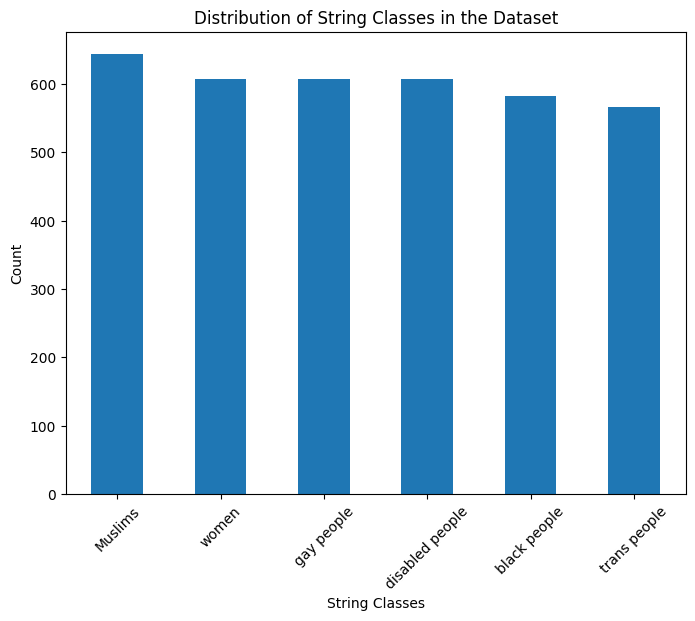

In [7]:
import matplotlib.pyplot as plt

# Extract target counts
target_counts = pd_dataset['target'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
target_counts.plot(kind='bar')
plt.title('Distribution of String Classes in the Dataset')
plt.xlabel('String Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [8]:
pd_dataset.drop(['case_id', 'templ_id', 'test_group_id', 'target', 'functionality', 'set', 'unrealistic_flags', 'included_in_test_suite'],axis=1, inplace=True)
pd_dataset.head()

,text,label_gold
0,I want to 🔪 all women,1
1,I want to 💣 all women,1
2,I want to 👊 all women,1
3,I want to 🔫 all women,1
4,I want to 💀 all women,1


In [9]:
for i in range(7):
  print(pd_dataset['text'][3923+i])


People now think Muslim lives matter
Too many w0men in my university
Too many tr4ns people in my university
Too many g4y people in my university
Too many bl4ck people in my university
Too many disabl3d people in my university
Too many Musl1ms in my university


In [10]:
import emoji
import re

def is_number(word):
    try:
        float(word)
        return True
    except ValueError:
        return False

def replace_nums(text):
    new_text = ""
    words = text.split()
    # Iterate through each word
    for word in words:
      if not is_number(word):
        #replace '4' with 'a'
        word = word.replace('4', 'a')
        #replace '3' with 'e'
        word = word.replace('3', 'e')
        #replace '1' with 'i'
        word = word.replace('1', 'i')
        #replace '0' with 'o'
        word = word.replace('0', 'o')

      new_text += word + " "
    return new_text.strip()

def process_text_with_emojis(text):
    # Use emoji_list() function from the emoji library to extract emoji information
    emoji_info = emoji.emoji_list(text)
    offset = 0

    # Iterate over each emoji match
    for match in emoji_info:
        # Get the emoji and its start and end positions
        emoji_text = match['emoji']
        match_start = match['match_start']+ offset
        match_end = match['match_end']+ offset

        # Convert the emoji to text using emoji.demojize() and remove surrounding colons
        emoji_text_converted = emoji.demojize(emoji_text)[1:-1].replace('_', ' ')
        # Add whitespace if necessary
        if match_start > 0 and text[match_start - 1] != ' ':
            emoji_text_converted = ' ' + emoji_text_converted
        if match_end < len(text) and text[match_end] != ' ':
            emoji_text_converted += ' '

        offset += len(emoji_text_converted)-(match_end-match_start)

        # Replace the emoji in the original text with the converted text
        text = text[:match_start] + emoji_text_converted + text[match_end:]

    text = re.sub(r'\s+', ' ', text)

    return text

def replace_emoji_and_num_in_dataset(df, text_column):
    df[text_column] = df[text_column].apply(process_text_with_emojis)
    df[text_column] = df[text_column].apply(replace_nums)
    return df

In [11]:
processed_dataset = replace_emoji_and_num_in_dataset(pd_dataset, 'text')
for i in range(7):
  print(processed_dataset['text'][3923+i])
processed_dataset.head()

People now think Muslim lives matter
Too many women in my university
Too many trans people in my university
Too many gay people in my university
Too many black people in my university
Too many disabled people in my university
Too many Muslims in my university


,text,label_gold
0,I want to kitchen knife all women,1
1,I want to bomb all women,1
2,I want to oncoming fist all women,1
3,I want to water pistol all women,1
4,I want to skull all women,1


**Load and process Dynamically Generated Hate Dataset**

In [30]:
text_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dynamically Generated Hate Dataset v0.2.3.csv")
text_df = text_df.head(2000)
text_df.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [31]:
columns_to_drop = ['Unnamed: 0', 'acl.id', 'X1', 'type', 'target', 'level', 'split', 'round.base', 'annotator', 'round', 'acl.id.matched']
existing_columns_to_drop = [col for col in columns_to_drop if col in text_df.columns]
text_df = text_df.drop(existing_columns_to_drop, axis=1)
text_df.head()

,text,label
0,dalits are lowlives,hate
1,gay people are a burden to our society,hate
2,Arabs are not welcome,hate
3,I'm not saying we should actually eliminate he...,hate
4,bananas are for black people,hate


In [32]:
for index, row in text_df.iterrows():
    if row['label']=='hate':
      row['label'] = 1
    else:
      row['label'] = 0

text_df.head()

,text,label
0,dalits are lowlives,1
1,gay people are a burden to our society,1
2,Arabs are not welcome,1
3,I'm not saying we should actually eliminate he...,1
4,bananas are for black people,1


**Import models to do the ensembling**

In [15]:
import torch
import torch.nn as nn
from transformers import DistilBertForSequenceClassification, DistilBertConfig, PreTrainedModel, DistilBertTokenizer, DistilBertModel
from transformers.modeling_outputs import SequenceClassifierOutput

class DistilBERTClassifierDavidsonDataset(PreTrainedModel):
    def __init__(self, config, weights=None):
        super(DistilBERTClassifierDavidsonDataset, self).__init__(config)

        self.config = config

        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')

        self.lin_class_1 = nn.Linear(config.hidden_size, config.dim)
        self.lin_class_2 = nn.Linear(config.dim, config.num_labels)

        for param in self.distilbert.parameters():
            param.requires_grad = False

        # for param in self.distilbert.transformer.layer[-3:].parameters():
        #     param.requires_grad = True

        self.dropout = nn.Dropout(config.dropout)
        self.num_labels = config.num_labels

        if weights is None:
            weights = torch.ones(self.num_labels)
        self.weights = weights

        self.init_weights()

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        return_dict = return_dict if return_dict is not None else self.config.use_return_dict

        distilbert_output = self.distilbert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        device = distilbert_output.last_hidden_state.device

        pooled_output = distilbert_output.last_hidden_state[:, 0, :]
        classifier_output = self.lin_class_1(pooled_output)
        classifier_output = nn.ReLU()(classifier_output)#+classifier_output
        classifier_output = self.dropout(classifier_output)
        logits = self.lin_class_2(classifier_output)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss(weight=self.weights.to(device))
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

        # if not return_dict:
        #     output = (logits,) + distilbert_output[1:]
        #     return ((loss,) + output) if loss is not None else output

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits,
            hidden_states=distilbert_output.hidden_states,
            attentions=distilbert_output.attentions,
        )

In [16]:
from transformers import DistilBertForSequenceClassification, DistilBertModel

# Define the custom model with class weights
class WeightedDistilBertForSequenceClassification(DistilBertForSequenceClassification):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.distilbert = DistilBertModel.from_pretrained("distilbert-base-uncased")
        self.classifier = nn.Linear(self.distilbert.config.hidden_size, config.num_labels)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.distilbert(input_ids, attention_mask=attention_mask)
        cls_output = outputs[0][:, 0, :]  # Get the output of the [CLS] token
        logits = self.classifier(cls_output)

        if labels is not None:
            loss_fn = nn.BCEWithLogitsLoss(weights = None)
            loss = loss_fn(logits, labels)
            return {"loss": loss, "logits": logits}

        return {"logits": logits}

In [17]:
import torch.nn as nn

# load the 3 models
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

# Ethos
model_ethos = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=8,
                                                            problem_type="multi_label_classification")
path_ethos = F"/content/drive/MyDrive/Colab Notebooks/ethos_multilabel_classifier.pt"
model_ethos.load_state_dict(torch.load(path_ethos))

# Davidson
config = DistilBertConfig(
    num_labels=3,
    hidden_size=768,
    dim=768,
    dropout=0.3,
)

path_davidson = F"/content/drive/MyDrive/Colab Notebooks/checkpoint-1240"
model_davidson = DistilBERTClassifierDavidsonDataset.from_pretrained(path_davidson, config=config, weights=None)

# Hatemoji
config = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=7).config
model_emoji_multilabel = WeightedDistilBertForSequenceClassification(config)
path_emoji_multilabel = F"/content/drive/MyDrive/Colab Notebooks/emoji_multilabel_classifier.pt"
model_emoji_multilabel.load_state_dict(torch.load(path_emoji_multilabel, map_location=torch.device('cpu')))




tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<All keys matched successfully>

**Pass the Datasets through each Model and balance the new dataset**

In [19]:
from tqdm import tqdm
import torch

def tokenize_sentence(text):
  return tokenizer(text, return_tensors='pt')

data = []
davidson_valid_count = 0
multilabel_hatemoji_valid_count = 0

model_ethos.eval()
model_davidson.eval()
model_emoji_multilabel.eval()

for index, row in tqdm(processed_dataset.iterrows()):
  encoding = tokenize_sentence(row['text'])
  label_gold = row['label_gold']

  with torch.no_grad():
    output1 = model_davidson(**encoding)
    output2 = model_ethos(**encoding)
    output4 = model_emoji_multilabel(**encoding)

  # acc davidson assuming hate and offensive as hate
  if (output1.logits[0][0] >= 0.5).int() == label_gold or (output1.logits[0][1] >= 0.5).int() == label_gold :
    davidson_valid_count +=1

  # acc emoji
  if (output4['logits'][0][6] <= 0).int() == label_gold :
    multilabel_hatemoji_valid_count +=1
  #all models
  combined_output = torch.cat((output1.logits, output2.logits, output4['logits']), dim=1).reshape(-1)
  data.append([combined_output.tolist(), label_gold])

  #only davidson and binary hatemoji
  #out1 = output1.logits.reshape(-1).tolist()
  #out4 = output4['logits'][0][6].tolist()
  #comb_out = [out1[0], out1[1], out1[2], out4]
  #data.append([comb_out, label_gold])

df = pd.DataFrame(data, columns=['combined_output', 'label_gold'])
df.head()

3930it [15:48,  4.14it/s]


,combined_output,label_gold
0,"[-0.5882528424263, 0.7448928356170654, -0.4529...",1
1,"[-0.17686256766319275, 1.4409213066101074, -1....",1
2,"[-0.8867653012275696, 1.693649172782898, -1.19...",1
3,"[-0.6232237219810486, 1.2283893823623657, -0.8...",1
4,"[-0.13863085210323334, 1.5369914770126343, -1....",1


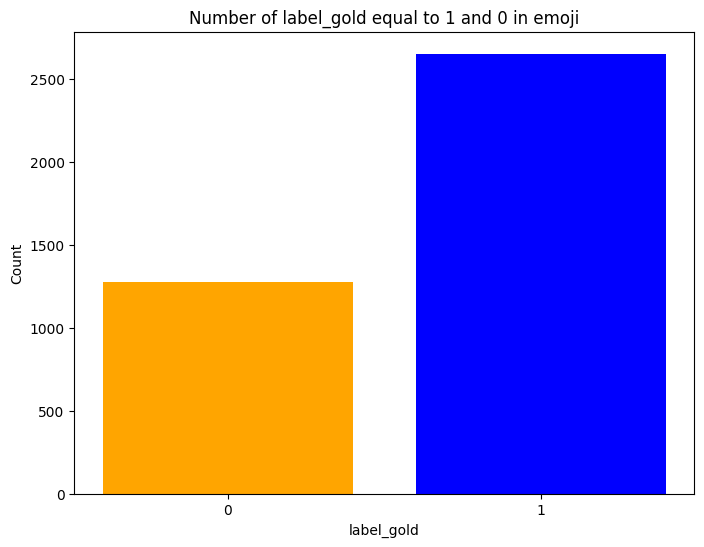

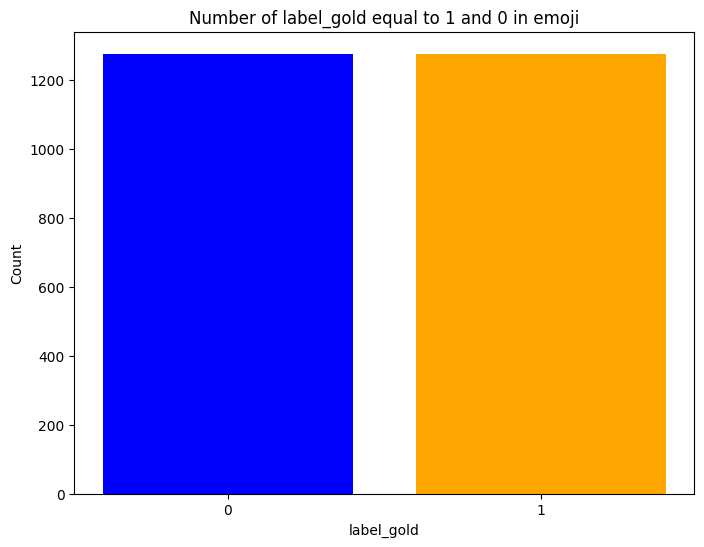

In [20]:
def plot_label_balancing(label_counts, dataset):
    plt.figure(figsize=(8, 6))
    plt.bar(label_counts.index, label_counts.values, color=['blue', 'orange'])
    plt.xticks([0, 1], ['0', '1'])
    plt.xlabel('label_gold')
    plt.ylabel('Count')
    plt.title(f'Number of label_gold equal to 1 and 0 in {dataset}')
    plt.show()

def balance_dataset(df, label_column):
    counts = df[label_column].value_counts()
    min_count = counts.min()

    balanced_df = (
        df.groupby(label_column)
          .apply(lambda x: x.sample(min_count))
          .reset_index(drop=True)
    )

    return balanced_df

label_count_emoji = df['label_gold'].value_counts()
plot_label_balancing(label_count_emoji, 'emoji')

balanced_df = balance_dataset(df, 'label_gold')
label_count_emoji_balanced = balanced_df['label_gold'].value_counts()
plot_label_balancing(label_count_emoji_balanced, 'emoji')


In [21]:
from sklearn.model_selection import train_test_split

_, balanced_emoji_df= train_test_split(balanced_df, test_size=0.63, random_state=42)
print(len(balanced_emoji_df['combined_output']))

1608


In [33]:
text_data = []
text_davidson_valid_count = 0
text_multilabel_hatemoji_valid_count = 0

model_ethos.eval()
model_davidson.eval()
model_emoji_multilabel.eval()

for index, row in tqdm(text_df.iterrows()):
  encoding = tokenize_sentence(row['text'])
  label_gold = row['label']

  with torch.no_grad():
    output1 = model_davidson(**encoding)
    output2 = model_ethos(**encoding)
    output4 = model_emoji_multilabel(**encoding)

  # acc davidson assuming hate and offensive as hate
  if (output1.logits[0][0] >= 0.5).int() == label_gold or (output1.logits[0][1] >= 0.5).int() == label_gold :
    text_davidson_valid_count +=1

  # acc hatemoji
  if (output4['logits'][0][6] <= 0).int() == label_gold :
    text_multilabel_hatemoji_valid_count +=1

  # All models
  combined_output = torch.cat((output1.logits, output2.logits, output4['logits']), dim=1).reshape(-1)
  text_data.append([combined_output.tolist(), label_gold])

  # Only davidson and binary hatemoji
  #out1 = output1.logits.reshape(-1).tolist()
  #out4 = output4['logits'][0][6].tolist()
  #comb_out = [out1[0], out1[1], out1[2], out4]
  #text_data.append([comb_out, label_gold])

text_df = pd.DataFrame(text_data, columns=['combined_output', 'label_gold'])
text_df.head()

2000it [06:11,  5.38it/s]


,combined_output,label_gold
0,"[0.728252649307251, -0.7053466439247131, -0.28...",1
1,"[1.0206992626190186, -0.20725688338279724, -1....",1
2,"[-0.31334322690963745, -1.5165321826934814, 1....",1
3,"[-1.4062602519989014, -0.19981418550014496, 1....",1
4,"[0.360456645488739, -0.39938822388648987, -0.2...",1


**Accuracy of Davidson and binary Hatemoji on the new datasets**

In [34]:
text_acc_davidson = text_davidson_valid_count/len(text_df['combined_output'])
text_acc_ethos = text_multilabel_hatemoji_valid_count/len(text_df['combined_output'])
print("acc davidson on text:", text_acc_davidson)
print("acc binaray emoji on text:", text_acc_ethos)

acc_davidson = davidson_valid_count/len(df['combined_output'])
acc_emoji = multilabel_hatemoji_valid_count/len(df['combined_output'])
print("acc davidson on emoji:", acc_davidson)
print("acc binaray on emoji :", acc_emoji)

acc davidson on text: 0.592
acc binaray emoji on text: 0.6555
acc davidson on emoji: 0.5559796437659033
acc binaray on emoji : 0.6997455470737913


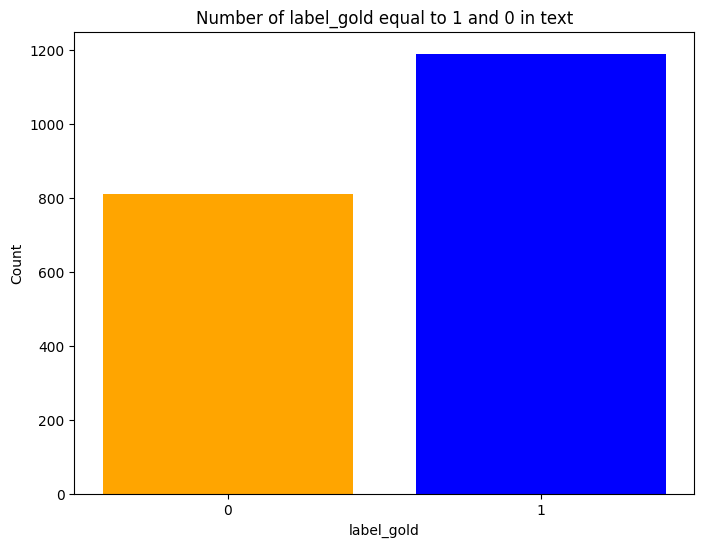

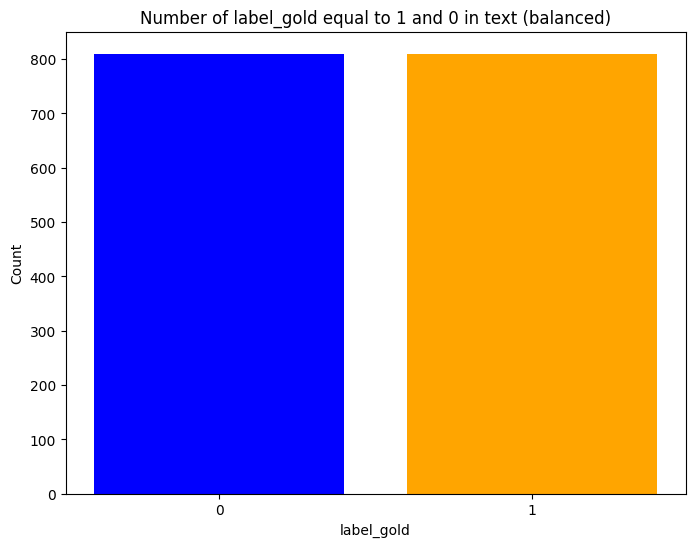

In [35]:
label_count_text = text_df['label_gold'].value_counts()
plot_label_balancing(label_count_text, 'text')

balanced_text_df = balance_dataset(text_df, 'label_gold')
label_count_text_balanced = balanced_text_df['label_gold'].value_counts()
plot_label_balancing(label_count_text_balanced, 'text (balanced)')

In [36]:
print(len(balanced_text_df['combined_output']), len(balanced_emoji_df['combined_output']))
text_emoji_df = pd.concat([balanced_text_df, balanced_emoji_df], ignore_index=True)
print(len(text_emoji_df['combined_output']))

1620 1608
3228


In [46]:
import pandas as pd
# Save
#df.to_pickle('/gdrive/MyDrive/Colab Notebooks/combined_output.pkl')
#text_df.to_pickle('/gdrive/MyDrive/Colab Notebooks/text_combined_output.pkl')
text_emoji_df.to_pickle('/content/drive/MyDrive/Colab Notebooks/text_emoji_combined_output.pkl')

# Load
#text_emoji_df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/text_emoji_combined_output.pkl')
#text_df = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/Miniprojet/Deep_learning_project/text_combined_output.pkl')
#df = pd.read_pickle('/gdrive/MyDrive/Colab Notebooks/combined_output.pkl')
#df.head()

**Ensemble model**

In [38]:
from sklearn.metrics import f1_score, accuracy_score
from IPython.display import clear_output
from tqdm import tqdm

def f1(preds, target):
    return f1_score(target.detach().cpu(), preds.detach().cpu(), average='macro')

def acc(preds, target):
    return accuracy_score(target.detach().cpu(), preds.detach().cpu())

def plot_training(train_loss, test_loss, metrics_names, train_metrics_logs, test_metrics_logs):
    fig, ax = plt.subplots(1, len(metrics_names) + 1, figsize=((len(metrics_names) + 1) * 5, 5))

    ax[0].plot(train_loss, c='blue', label='train')
    ax[0].plot(test_loss, c='orange', label='test')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('epoch')
    ax[0].legend()

    for i in range(len(metrics_names)):
        ax[i + 1].plot(train_metrics_logs[i], c='blue', label='train')
        ax[i + 1].plot(test_metrics_logs[i], c='orange', label='test')
        ax[i + 1].set_title(metrics_names[i])
        ax[i + 1].set_xlabel('epoch')
        ax[i + 1].legend()

    plt.show()

def train_epoch(model, optimizer, criterion, metrics, train_loader, device):
    epoch_loss = 0.0
    epoch_metrics = dict(zip(metrics.keys(), torch.zeros(len(metrics))))

    model.train()

    for (_, batch) in enumerate(train_loader):
        data = torch.stack(batch['combined_output']).float().to(device).permute(1, 0)
        target = batch['label_gold'].unsqueeze(1).float().to(device)

        optimizer.zero_grad()
        output = model(data)

        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            binary_pred = (torch.sigmoid(output) >= 0.5).int()
            for key in epoch_metrics.keys():
                epoch_metrics[key] += metrics[key](binary_pred, target).item()

        epoch_loss += loss.item()

    epoch_loss /= len(train_loader)

    for key in epoch_metrics.keys():
        epoch_metrics[key] /= len(train_loader)

    clear_output(wait=True)  # clean the prints from previous epochs
    print('Train Loss: {:.4f}, '.format(epoch_loss),
          ', '.join(['{}: {:.4f}'.format(key, epoch_metrics[key]) for key in epoch_metrics.keys()]))

    return epoch_loss, epoch_metrics

def evaluate(model, criterion, metrics, test_loader, device):
    epoch_loss = 0
    epoch_metrics = dict(zip(metrics.keys(), torch.zeros(len(metrics))))

    model.eval()

    for (_, batch) in enumerate(test_loader):
        with torch.no_grad():
            data = torch.stack(batch['combined_output']).float().to(device).permute(1, 0)
            target = batch['label_gold'].unsqueeze(1).float().to(device)

            output = model(data)
            loss = criterion(output, target)
            binary_pred = (torch.sigmoid(output) >= 0.5).int()

            for k in epoch_metrics.keys():
                epoch_metrics[k] += metrics[k](binary_pred, target)

            epoch_loss += loss.item()

    epoch_loss /= len(test_loader)

    for k in epoch_metrics.keys():
          epoch_metrics[k] /= len(test_loader)

    print('eval Loss: {:.4f}, '.format(epoch_loss),
          ', '.join(['{}: {:.4f}'.format(k, epoch_metrics[k]) for k in epoch_metrics.keys()]))

    return epoch_loss,  epoch_metrics

def update_metrics_log(metrics_names, metrics_log, new_metrics_dict):
    for i in range(len(metrics_names)):
        curr_metric_name = metrics_names[i]
        metrics_log[i].append(new_metrics_dict[curr_metric_name])
    return metrics_log

def train_cycle(model, optimizer, criterion, metrics, train_loader, test_loader, n_epochs, device, num_hidden_layers, hidden_dim, scheduler = None):
    train_loss_log,  test_loss_log = [], []
    metrics_names = list(metrics.keys())
    train_metrics_log = [[] for i in range(len(metrics))]
    test_metrics_log = [[] for i in range(len(metrics))]


    for epoch in range(n_epochs):
        print("Epoch {0} of {1}".format(epoch, n_epochs), "num_hidden_layers : {0} hidden_dim {1}".format(num_hidden_layers, hidden_dim))
        train_loss, train_metrics = train_epoch(model, optimizer, criterion, metrics, train_loader, device)

        test_loss, test_metrics = evaluate(model, criterion, metrics, test_loader, device)

        if scheduler:
            scheduler.step()

        train_loss_log.append(train_loss)
        train_metrics_log = update_metrics_log(metrics_names, train_metrics_log, train_metrics)

        test_loss_log.append(test_loss)
        test_metrics_log = update_metrics_log(metrics_names, test_metrics_log, test_metrics)

        plot_training(train_loss_log, test_loss_log, metrics_names, train_metrics_log, test_metrics_log)
    return train_metrics_log, test_metrics_log

In [55]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

class LinearLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearLayer, self).__init__()
        self.linear_layer = nn.Sequential(
            nn.Linear(in_features, out_features),
            #nn.ReLU(),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm1d(out_features),
            nn.Dropout(p=0.2)
        )

    def forward(self, x):
        return self.linear_layer(x)

class DynamicNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_hidden_layers):
        super(DynamicNN, self).__init__()

        layers = [LinearLayer(input_dim, hidden_dim)]
        for _ in range(num_hidden_layers):
            layers.append(LinearLayer(hidden_dim, hidden_dim))
        layers.append(nn.Linear(hidden_dim, output_dim))

        self.structure = nn.Sequential(*layers)

    def forward(self, x):
        return self.structure(x)

Train Loss: 0.5915,  ACC: 0.6910, F1: 0.6736
eval Loss: 0.5773,  ACC: 0.7065, F1: 0.6677


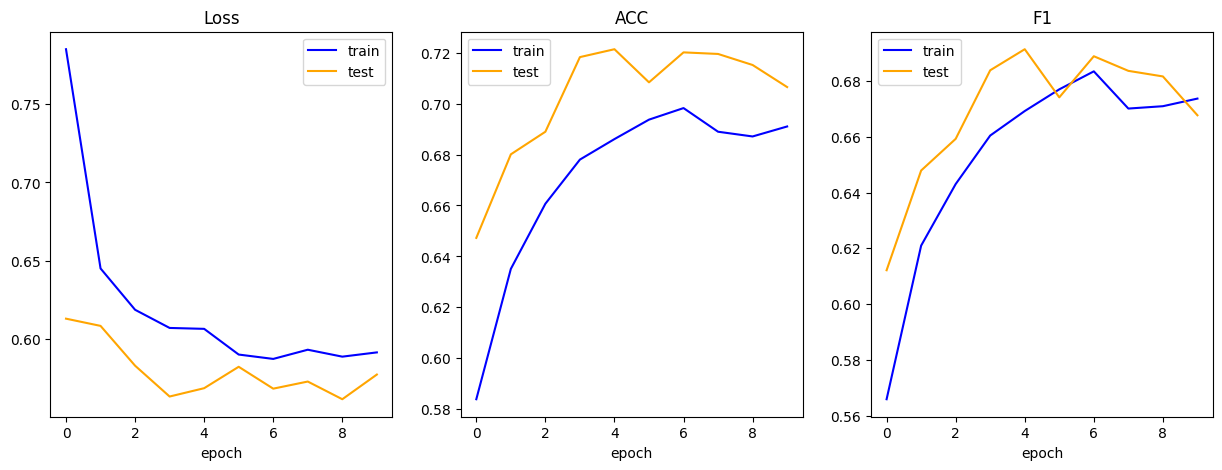

In [52]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from datasets import Dataset
from torch.optim.lr_scheduler import LambdaLR

# Define the dimensions
dim_in = len(df['combined_output'][0])
dim_out = 1

train, test= train_test_split(text_emoji_df, test_size=0.5, random_state=42)

batch_size = 8
train = Dataset.from_pandas(train)
test = Dataset.from_pandas(test)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=False)

N_EPOCHS = 10

learning_rate = 0.001

metrics = {'ACC': acc, 'F1': f1}
criterion = nn.BCEWithLogitsLoss()

hidden_dims = [64, 128, 256, 512, 1024]
num_max_layer = 5

dynamic_performance = []

for num_hidden_layers in range(num_max_layer):
    num_hidden_layers+=1
    for hidden_dim in hidden_dims:
        ensemble_model = DynamicNN(dim_in, dim_out, hidden_dim, num_hidden_layers)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        ensemble_model.to(device)

        optimizer = torch.optim.Adam(ensemble_model.parameters(), lr=learning_rate)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)

        train_metrics_log, test_metrics_log = train_cycle(
                                                          ensemble_model,
                                                          optimizer,
                                                          criterion,
                                                          metrics,
                                                          train_loader,
                                                          test_loader,
                                                          N_EPOCHS,
                                                          device,
                                                          num_hidden_layers,
                                                          hidden_dim,
                                                          scheduler
                                                        )
        dyn_m = [max(inner_list) for inner_list in test_metrics_log]
        dyn_metrics = {'ACC': dyn_m[0],
                       'F1': dyn_m[1],
                       'num_hidden_layers': num_hidden_layers,
                       'hidden_dim': hidden_dim}
        dynamic_performance.append(dyn_metrics)



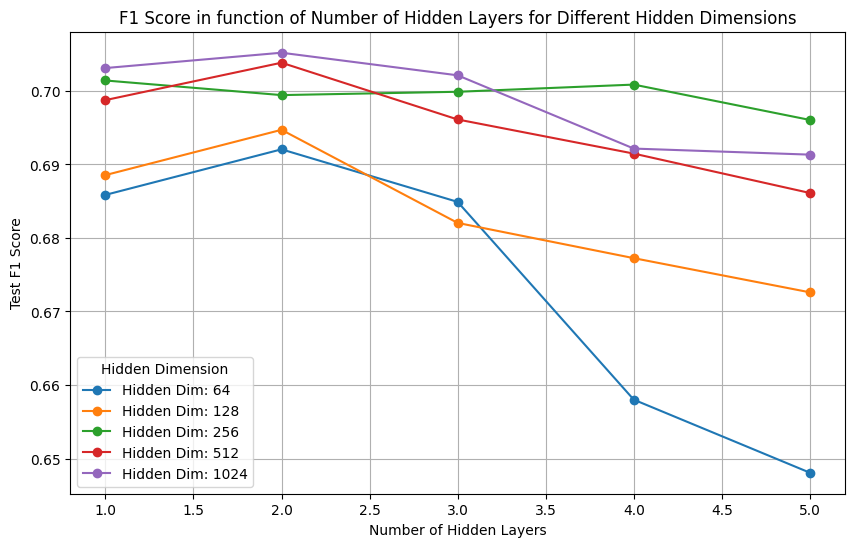

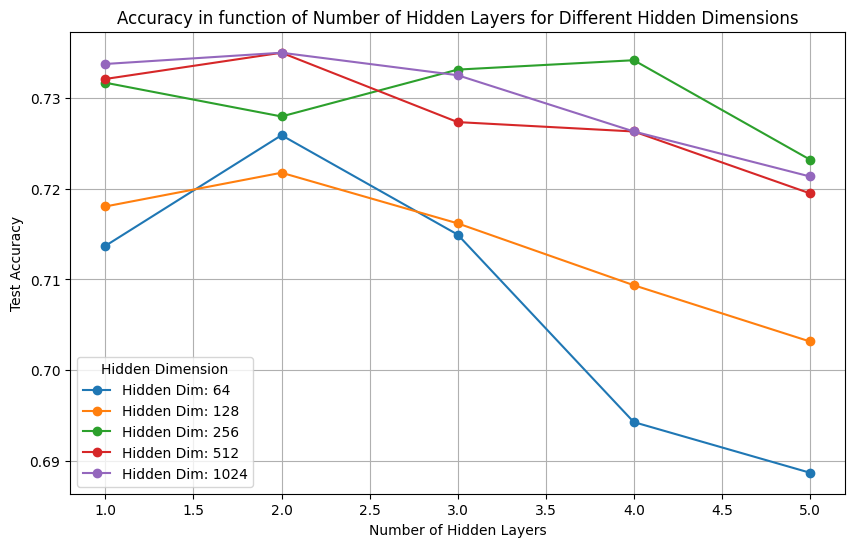

In [53]:
# Function to plot accuracy vs number of hidden layers with different colors for each hidden dimension
def plot_accuracy_vs_hidden_layers(dynamic_performance):
    grouped_performance = {}
    for entry in dynamic_performance:
        hidden_dim = entry['hidden_dim']
        if hidden_dim not in grouped_performance:
            grouped_performance[hidden_dim] = []
        grouped_performance[hidden_dim].append(entry)

    plt.figure(figsize=(10, 6))
    for hidden_dim, entries in grouped_performance.items():
        num_hidden_layers = [entry['num_hidden_layers'] for entry in entries]
        accuracies = [entry['ACC'] for entry in entries]
        plt.plot(num_hidden_layers, accuracies, marker='o', label=f'Hidden Dim: {hidden_dim}')

    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Test Accuracy')
    plt.title('Accuracy in function of Number of Hidden Layers for Different Hidden Dimensions')
    plt.legend(title='Hidden Dimension')
    plt.grid(True)
    plt.show()

def plot_f1_vs_hidden_layers(dynamic_performance):
    grouped_performance = {}
    for entry in dynamic_performance:
        hidden_dim = entry['hidden_dim']
        if hidden_dim not in grouped_performance:
            grouped_performance[hidden_dim] = []
        grouped_performance[hidden_dim].append(entry)

    plt.figure(figsize=(10, 6))
    for hidden_dim, entries in grouped_performance.items():
        num_hidden_layers = [entry['num_hidden_layers'] for entry in entries]
        f1_scores = [entry['F1'] for entry in entries]
        plt.plot(num_hidden_layers, f1_scores, marker='o', label=f'Hidden Dim: {hidden_dim}')

    plt.xlabel('Number of Hidden Layers')
    plt.ylabel('Test F1 Score')
    plt.title('F1 Score in function of Number of Hidden Layers for Different Hidden Dimensions')
    plt.legend(title='Hidden Dimension')
    plt.grid(True)
    plt.show()

plot_f1_vs_hidden_layers(dynamic_performance)
plot_accuracy_vs_hidden_layers(dynamic_performance)

In [54]:
def get_best_accuracy_index(dynamic_performance):
    best_index = max(range(len(dynamic_performance)), key=lambda i: dynamic_performance[i]['ACC'])
    return best_index

best_acc_index = get_best_accuracy_index(dynamic_performance)
print(dynamic_performance[best_acc_index])

{'ACC': tensor(0.7349), 'F1': tensor(0.7038), 'num_hidden_layers': 2, 'hidden_dim': 512}
